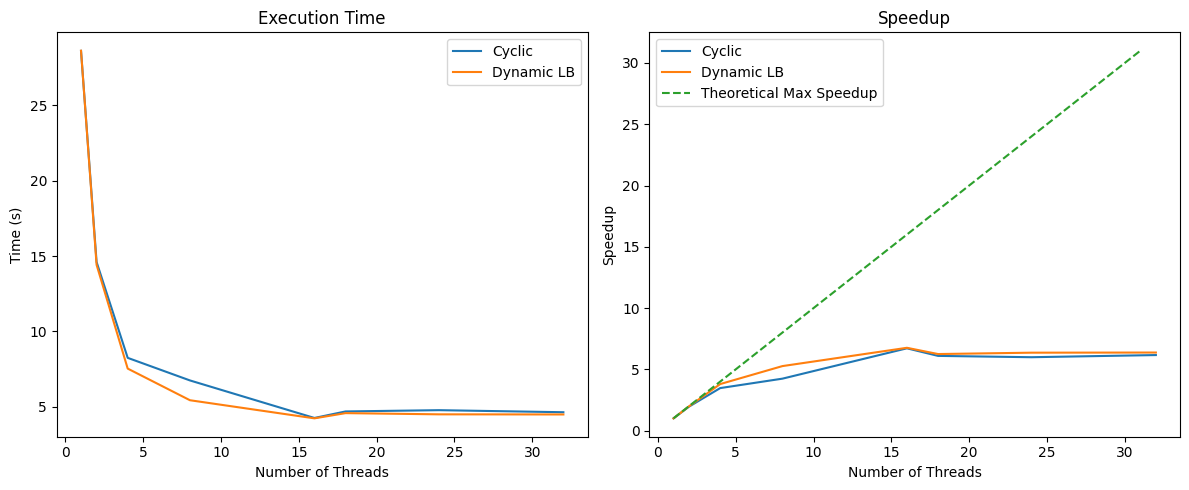

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load data
df_cyclic = pd.read_csv("../output_data/cyclic_parameter_sweep.csv")
df_dynamic = pd.read_csv("../output_data/dynamic_parameter_sweep.csv")

# Filter relevant data
df_cycl_rel = df_cyclic[np.logical_and(df_cyclic["Resolution"] == "2880x1920", df_cyclic["Max Iterations"] == 2000)]
df_dyn_rel = df_dynamic[np.logical_and(df_dynamic["Resolution"] == "2880x1920", df_dynamic["Max Iterations"] == 2000)]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot 1: Execution time vs threads
axes[0].plot(df_cycl_rel["Threads"], df_cycl_rel["Time (s)"], label="Cyclic")
axes[0].plot(df_dyn_rel["Threads"], df_dyn_rel["Time (s)"], label="Dynamic LB")
axes[0].set_xlabel("Number of Threads")
axes[0].set_ylabel("Time (s)")
axes[0].set_title("Execution Time")
axes[0].legend()

# Plot 2: Speedup vs threads
axes[1].plot(df_cycl_rel["Threads"], df_cycl_rel["Time (s)"].iloc[0] / df_cycl_rel["Time (s)"], label="Cyclic")
axes[1].plot(df_dyn_rel["Threads"], df_dyn_rel["Time (s)"].iloc[0] / df_dyn_rel["Time (s)"], label="Dynamic LB")
axes[1].plot(np.arange(1, 32), np.arange(1, 32), linestyle='--', label="Theoretical Max Speedup")
axes[1].set_xlabel("Number of Threads")
axes[1].set_ylabel("Speedup")
axes[1].set_title("Speedup")
axes[1].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()